In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/churn-modelling


In [3]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [4]:
df.columns,len(df.columns)

(Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'),
 14)

In [5]:
for i in df.columns:
    print(df[i].value_counts().shape[0],i)

10000 RowNumber
10000 CustomerId
2932 Surname
460 CreditScore
3 Geography
2 Gender
70 Age
11 Tenure
6382 Balance
4 NumOfProducts
2 HasCrCard
2 IsActiveMember
9999 EstimatedSalary
2 Exited


In [6]:
df.duplicated().sum(),df.isnull().sum()

(0,
 RowNumber          0
 CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64)

In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype='int64')

In [9]:
df.shape

(10000, 12)

In [10]:
X=df.drop('Exited',axis=1)

In [11]:
y=df['Exited']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [14]:
X_train_scaled=scaler.fit_transform(X_train)

In [15]:
X_test_scaled=scaler.transform(X_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-26 04:44:14.196105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753505054.415744      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753505054.479686      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
X_train.shape

(8000, 11)

In [18]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-26 04:44:28.220713: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62 (248.00 B)

 Trainable params: 62 (248.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7667 - loss: 0.6225 - val_accuracy: 0.7987 - val_loss: 0.5409
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.5360 - val_accuracy: 0.7987 - val_loss: 0.5010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.5169 - val_accuracy: 0.7987 - val_loss: 0.4860
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4839 - val_accuracy: 0.7987 - val_loss: 0.4771
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.4916 - val_accuracy: 0.7987 - val_loss: 0.4692
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4730 - val_accuracy: 0.7987 - val_loss: 0.4603
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4555 - val_accuracy: 0.7987 - val_loss: 0.4516
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4506 - val_accu

In [22]:
model.layers[0].get_weights()

[array([[-1.48058580e-02,  1.83142126e-02, -5.88635840e-02],
        [ 1.12532783e+00, -5.23704410e-01,  2.00957917e-02],
        [ 1.18733563e-01,  9.31486604e-04, -3.41601372e-02],
        [ 1.97805598e-01,  9.86525193e-02,  3.94793302e-01],
        [ 4.81634855e-01,  4.37962413e-01,  1.22007883e+00],
        [ 1.34404927e-01, -1.52337914e-02, -7.11275116e-02],
        [ 1.45263445e+00,  1.03078000e-01,  1.13271706e-01],
        [ 7.05205798e-02,  2.82537588e-03,  2.99692303e-02],
        [-4.72707480e-01, -1.84819147e-01, -3.56763154e-01],
        [ 1.50461435e-01, -2.39176285e-02,  4.54754122e-02],
        [ 1.46349609e-01,  8.85566026e-02, -2.41318475e-02]], dtype=float32),
 array([-0.84713817,  1.3804679 , -0.9791802 ], dtype=float32)]

In [23]:
model.layers[1].get_weights()

[array([[-0.26104695,  0.96157885, -0.1345585 , -0.38058493, -0.09586032],
        [ 1.2051986 ,  0.72955245, -0.42943156,  1.0263997 ,  0.70512015],
        [-0.7156095 , -0.7980115 , -0.65281665, -0.5209811 ,  1.781447  ]],
       dtype=float32),
 array([-9.3043683e-04, -5.0142698e-04,  0.0000000e+00,  9.2424086e-04,
         1.0329446e+00], dtype=float32)]

In [24]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
y_log

array([[0.03888344],
       [0.02673438],
       [0.17395349],
       ...,
       [0.68038195],
       [0.09639909],
       [0.33085385]], dtype=float32)

In [26]:
y_pred=np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [28]:
import matplotlib.pyplot as plt

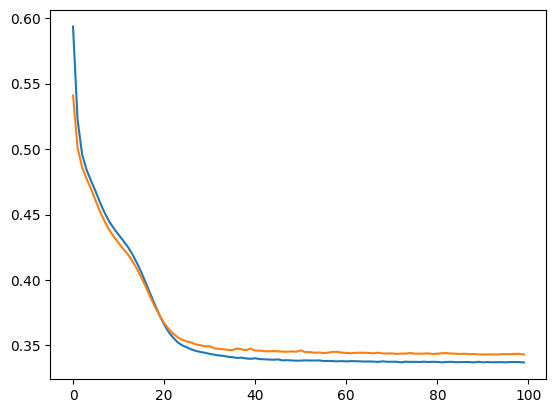

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [30]:
#Since after 90 epochs there is flat curve we are geeting there is no need to to to trian on more epochs  
# so we can tarin our model on less epochs to get same result to save the time as well

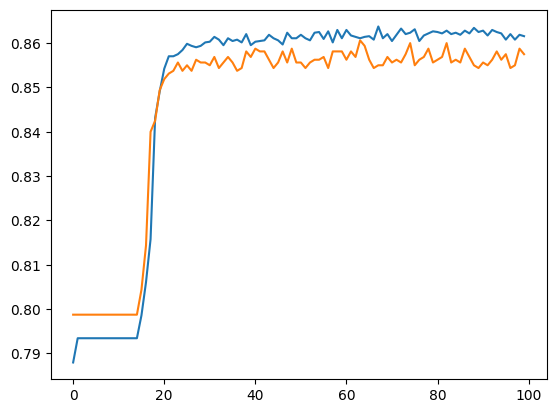

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])